In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [32]:
imdb = keras.datasets.imdb

In [33]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [34]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [35]:
word_index=imdb.get_word_index()
reverse_word_index=dict(
                    [(value,key) for (key,value) in word_index.items()])
decoded_review = "".join(
    [reverse_word_index.get(i-3,"?") for i in train_data[0]])

In [36]:
def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]=1.
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [37]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [38]:
y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

In [39]:
model=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation="sigmoid")
])

In [40]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])


In [41]:
#creating validation set
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]


In [42]:
history= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.6928 - loss: 0.6179 - val_accuracy: 0.8660 - val_loss: 0.3698
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9017 - loss: 0.2931 - val_accuracy: 0.8848 - val_loss: 0.2905
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9372 - loss: 0.1955 - val_accuracy: 0.8912 - val_loss: 0.2741
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9604 - loss: 0.1388 - val_accuracy: 0.8869 - val_loss: 0.2829
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9736 - loss: 0.1055 - val_accuracy: 0.8830 - val_loss: 0.2993
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9807 - loss: 0.0795 - val_accuracy: 0.8795 - val_loss: 0.3231
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9894 - loss: 0.0604 - val_accuracy: 0.8785 - val_loss: 0.3486
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9930 - loss: 0.0468 - val_accuracy: 0.8764 - v

In [43]:
history_dict=history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

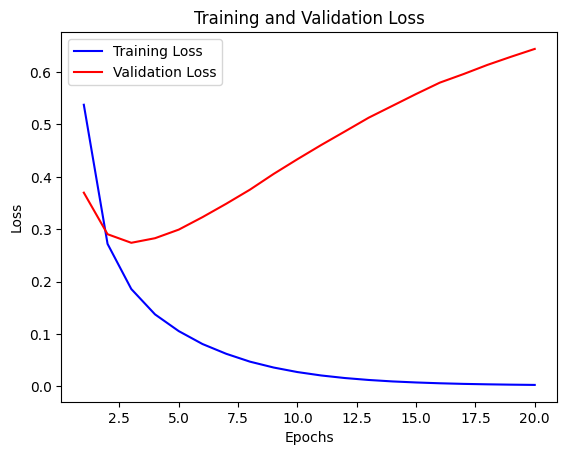

In [44]:
# Extract loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

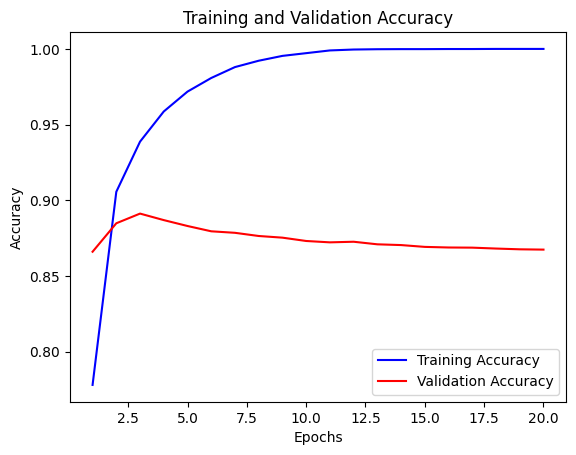

In [45]:
# Extract loss values from the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
results=model.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8573 - loss: 0.7034


In [47]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.00537276],
       [1.        ],
       [0.83714145],
       ...,
       [0.00216839],
       [0.00909268],
       [0.9357894 ]], dtype=float32)

## 1.You used two hidden layers. Try using one or three hidden layers and see how doing so affects validation and test accuracy.

In [48]:
model2=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation="sigmoid")
])

In [49]:
model2.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])
history2= model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.6271 - loss: 0.6361 - val_accuracy: 0.8503 - val_loss: 0.4102
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8992 - loss: 0.3196 - val_accuracy: 0.8869 - val_loss: 0.2904
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9406 - loss: 0.1831 - val_accuracy: 0.8863 - val_loss: 0.2842
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9642 - loss: 0.1241 - val_accuracy: 0.8839 - val_loss: 0.3028
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9777 - loss: 0.0879 - val_accuracy: 0.8813 - val_loss: 0.3314
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9896 - loss: 0.0549 - val_accuracy: 0.8786 - val_loss: 0.3770
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9930 - loss: 0.0404 - val_accuracy: 0.8733 - val_loss: 0.4288
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9960 - loss: 0.0258 - val_accuracy: 0.8737 - v

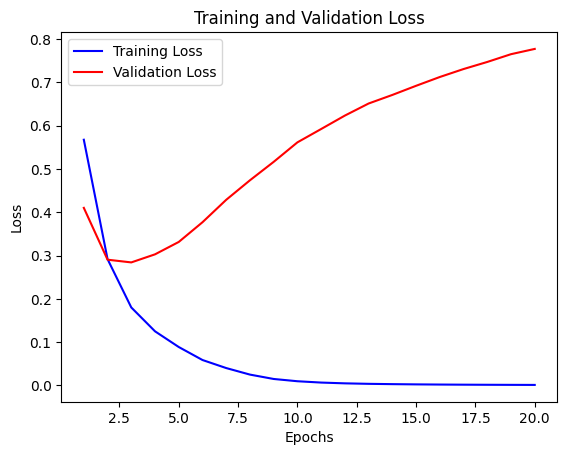

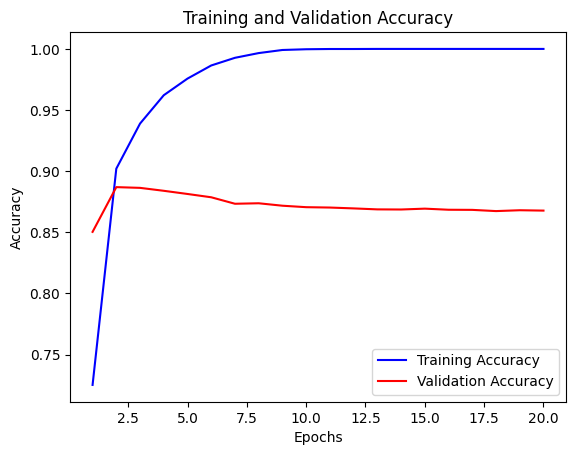

In [50]:
# Extract loss values from the training history
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Extract loss values from the training history
train_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
results2=model2.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8542 - loss: 0.8519


## 2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

In [52]:
model3=keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(1, activation="sigmoid")
])

In [53]:
model3.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])
history3= model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.6938 - loss: 0.6152 - val_accuracy: 0.8631 - val_loss: 0.3661
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9019 - loss: 0.2877 - val_accuracy: 0.8907 - val_loss: 0.2778
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9455 - loss: 0.1694 - val_accuracy: 0.8876 - val_loss: 0.2837
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9677 - loss: 0.1141 - val_accuracy: 0.8841 - val_loss: 0.3035
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9805 - loss: 0.0788 - val_accuracy: 0.8789 - val_loss: 0.3433
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9881 - loss: 0.0558 - val_accuracy: 0.8789 - val_loss: 0.3697
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9950 - loss: 0.0352 - val_accuracy: 0.8779 - val_loss: 0.4148
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9978 - loss: 0.0231 - val_accuracy: 0.8737 - v

In [54]:
results3=model3.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8567 - loss: 0.8349


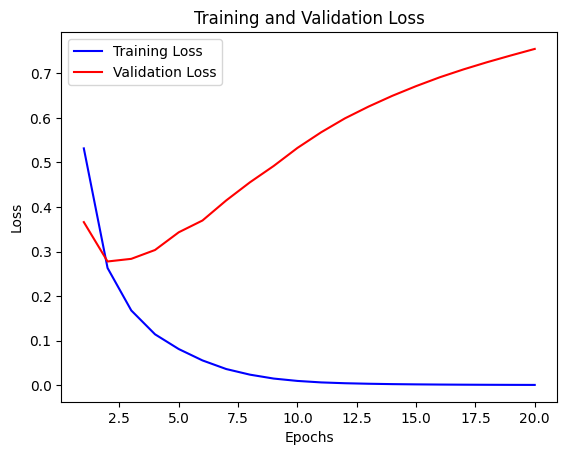

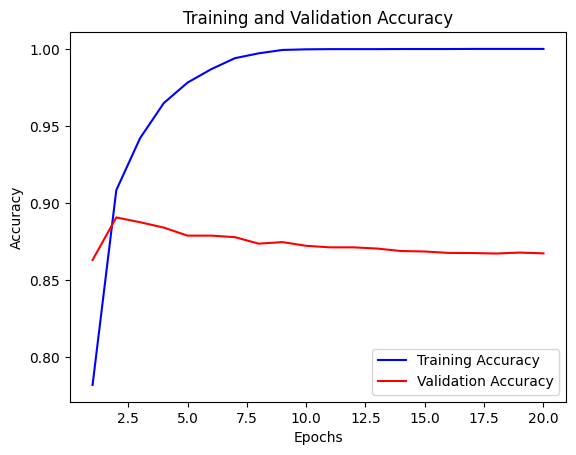

In [55]:
# Extract loss values from the training history
train_loss = history3.history['loss']
val_loss = history3.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Extract loss values from the training history
train_accuracy = history3.history['accuracy']
val_accuracy = history3.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Try using the mse loss function instead of binary_crossentropy.

In [56]:
model.compile(optimizer="adam",
             loss="mse",
              metrics=["accuracy"])
history4= model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 1.0000 - loss: 1.0392e-04 - val_accuracy: 0.8643 - val_loss: 0.1158
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 1.4957e-04 - val_accuracy: 0.8633 - val_loss: 0.1186
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 1.0000 - loss: 1.2279e-04 - val_accuracy: 0.8598 - val_loss: 0.1212
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9999 - loss: 2.1463e-04 - val_accuracy: 0.8598 - val_loss: 0.1218
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9999 - loss: 2.5374e-04 - val_accuracy: 0.8612 - val_loss: 0.1215
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9998 - loss: 2.5967e-04 - val_accuracy: 0.8624 - val_loss: 0.1221
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9994 - loss: 5.3285e-04 - val_accuracy: 0.8525 - val_loss: 0.1299
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9966 - loss: 0.002

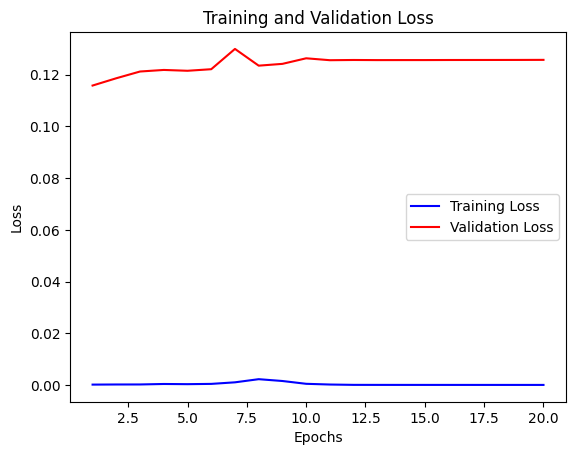

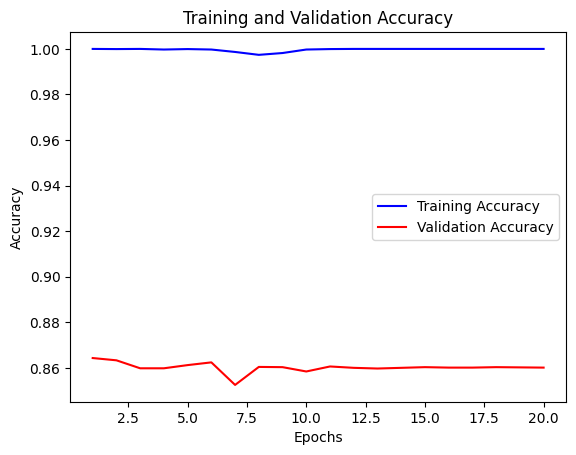

In [57]:
# Extract loss values from the training history
train_loss = history4.history['loss']
val_loss = history4.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Extract accuracy values from the training history
train_accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
results4=model4.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8533 - loss: 0.6457


## 4. Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.

In [59]:
model4=keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation = "tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [60]:
model4.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])
history4= model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.6873 - loss: 0.5972 - val_accuracy: 0.8582 - val_loss: 0.3737
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8986 - loss: 0.2988 - val_accuracy: 0.8866 - val_loss: 0.2848
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9408 - loss: 0.1893 - val_accuracy: 0.8878 - val_loss: 0.2727
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9603 - loss: 0.1370 - val_accuracy: 0.8852 - val_loss: 0.2839
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9763 - loss: 0.0970 - val_accuracy: 0.8808 - val_loss: 0.3055
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9852 - loss: 0.0723 - val_accuracy: 0.8793 - val_loss: 0.3294
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9926 - loss: 0.0496 - val_accuracy: 0.8747 - val_loss: 0.3619
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9959 - loss: 0.0374 - val_accuracy: 0.8716 - v

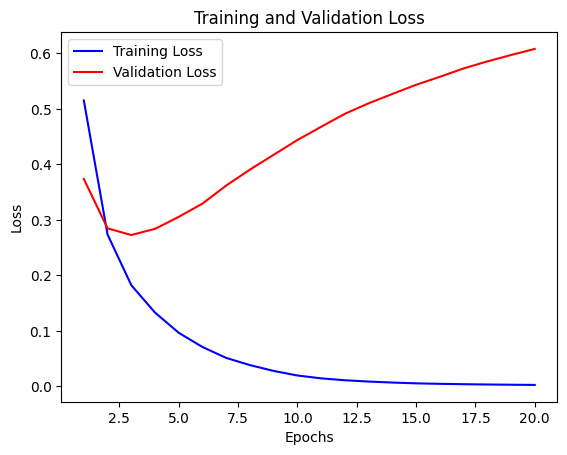

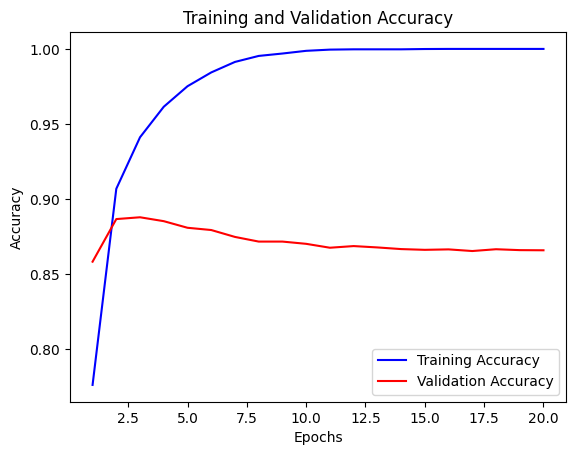

In [61]:
# Extract loss values from the training history
train_loss = history4.history['loss']
val_loss = history4.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Extract accuracy values from the training history
train_accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [62]:
results4=model4.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8520 - loss: 0.6754


## 5. Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

In [63]:
model5=keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(16, activation = "relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid")
])

In [64]:
model5.compile(optimizer="adam",
             loss="binary_crossentropy",
              metrics=["accuracy"])
history5= model5.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.6429 - loss: 0.6408 - val_accuracy: 0.8513 - val_loss: 0.4573
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8441 - loss: 0.4335 - val_accuracy: 0.8777 - val_loss: 0.3439
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8879 - loss: 0.3192 - val_accuracy: 0.8868 - val_loss: 0.2952
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9168 - loss: 0.2453 - val_accuracy: 0.8878 - val_loss: 0.2820
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9372 - loss: 0.1946 - val_accuracy: 0.8855 - val_loss: 0.2846
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9542 - loss: 0.1583 - val_accuracy: 0.8846 - val_loss: 0.2898
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9659 - loss: 0.1240 - val_accuracy: 0.8853 - val_loss: 0.3078
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9733 - loss: 0.0999 - val_accuracy: 0.8844 - 

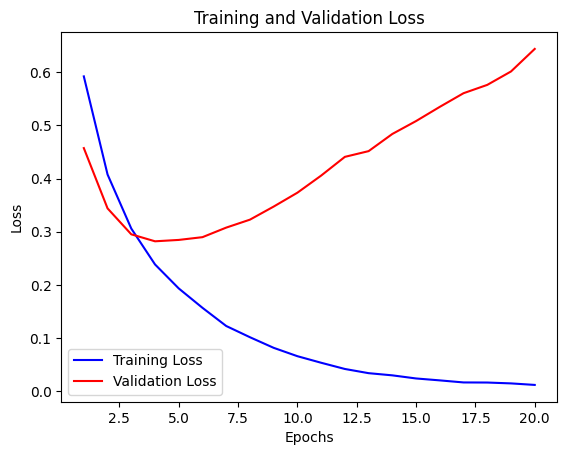

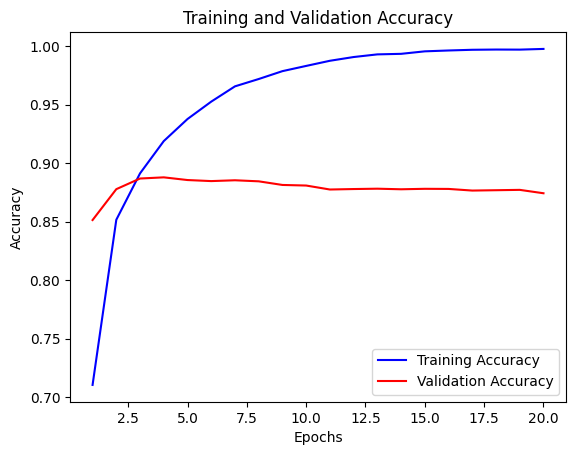

In [65]:
# Extract loss values from the training history
train_loss = history5.history['loss']
val_loss = history5.history['val_loss']

# Create an array of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Extract accuracy values from the training history
train_accuracy = history5.history['accuracy']
val_accuracy = history5.history['val_accuracy']

# Create an array of epoch numbers
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [66]:
results=model5.evaluate(x_test,y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8582 - loss: 0.7189
